In [2]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# read edge list in csv

In [11]:
# From & To: names of the nodes connected.
# strname: edge attribute indicating the street name indicated. 
# distance: edge attribute indicating trail length in miles.
# direction: edge attribute indicating direction of street from node1 to node2
# re-direction: edge attribute indicating reverse of direction
# remark: edge attribute indicating whether the street is one way (1=one way, 0=not one way),for define direct graph later 
edgelist = pd.read_csv('Edges.csv')
edgelist.head(10)

,From,To,distance,strname,direction,re_direction,Remark
0,Wohlers Hall,sixgregory,22,S 6th Str,north,south,0
1,sixgregory,College of Business,58,E Gregory Dr,west,east,0
2,sixgregory,Harding Band Building,48,S 6th Str,north,south,0
3,College of Business,George Huff Hall,153,E Gregory Dr,west,east,0
4,George Huff Hall,forthgregory,57,E Gregory Dr,west,east,0
5,forthgregory,fortharmory,142,S 4th Str,north,south,0
6,fortharmory,Ice Arena,59,E Armory Ave,east,west,0
7,fortharmory,Police Training Institution,110,S 4th Str,north,north,0
8,Ice Arena,fiftharmory,68,E Armory Ave,east,west,0
9,fiftharmory,Armory,22,S 5th Str,south,north,0


# read node list in csv

In [ ]:
# node_name: name of the node corresponding to node1 and node2 in the edge list.
# code: node attribute, a string or a list of string, indicating the mail code inside a building
# type: node attribute indicating the type of node(bd=building, is=intersection)
nodelist = pd.read_csv('Building_details.csv')
nodelist.head(10)

,node_name,code,type
0,Department of Statistics,374.0,BD
1,Altgeld Hall,382.0,BD
2,wrightjohn,NaN,IS
3,sixthjohn,NaN,IS
4,wrightdaniel,NaN,IS
5,sixthdaniel,NaN,IS
6,fifthdaniel,NaN,IS
7,School of Information Science,493.0,BD
8,Illini Union Bookstore,343.0,BD
9,Henry Administration Building,334.0,BD


# create graph

In [31]:
g = nx.DiGraph()
for i in range(len(edgelist)):
    if edgelist['Remark'][i]==1:
        g.add_edge(edgelist['From'][i], edgelist['To'][i],distance=edgelist['distance'][i],
                   direction=edgelist['direction'], strname=edgelist['strname'])
    elif edgelist['Remark'][i]==0:
        g.add_edge(edgelist['To'][i], edgelist['From'][i],distance=edgelist['distance'][i],
                   direction=edgelist['direction'], strname=edgelist['strname'])
        g.add_edge(edgelist['From'][i], edgelist['To'][i],distance=edgelist['distance'][i],
                   direction=edgelist['direction'], strname=edgelist['strname'])

In [45]:
for i in range(len(nodelist)):
    g.add_node(nodelist['node_name'][i], code=nodelist['code'][i],nodetype=nodelist['type'][i])

C:\Users\A\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\A\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


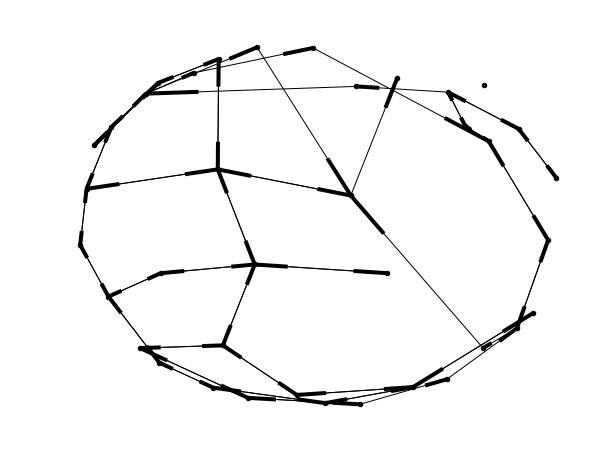

In [47]:
plt.figure(figsize=(8, 6))
nx.draw(g, node_size=20, node_color='black')
plt.show()